# Assignment Name : Bike Sharing

### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

# Problem Statement:
### A US bike-sharing provider BoomBikes is lokking forward for below problem statements to improve his service for a better profitable business in market
###    1. Which variables are significant in predicting the demand for shared bikes
###    2. How well those variables describe the bike demands

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import numpy and pands packages

import numpy as np
import pandas as pd

In [3]:
# Import all visualization Librariries

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import dataset

ds = pd.read_csv('day.csv')
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Data shape
ds.shape

(730, 16)

In [6]:
# Information of data
ds.info()
# All data type are properly described except dteday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Check missing values
ds.isna().mean()
# There is no null entries in the dataset

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# Check all unique levels of the attributes
ds.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
# derive a day column
ds['day'] = pd.DatetimeIndex(ds['dteday']).day

In [10]:
# Bin the month day with 3 different category
bins = [0, 10, 20, 32]
labels = [1,2,3]
ds['bin_day'] = pd.cut(ds['day'], bins=bins, labels=labels)

### Conversion of categorical values

In [11]:
# Convert Season values
ds.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

# Convert Weathersit values
ds.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

# Convert Month values
ds.mnth = ds.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
# Convert Weekdays values
ds.weekday = ds.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,bin_day
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801,1,1
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,1
3,4,04-01-2018,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,1
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,1


# Data Cleanning

In [12]:
# Dropping instant as it represent the sequence and its not giving any information about the data.
ds.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have day, month and year columns to work with
ds.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both
ds.drop(['casual'], axis = 1, inplace = True)
ds.drop(['registered'], axis = 1, inplace = True)

In [13]:
# Final columns
ds.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day',
       'bin_day'],
      dtype='object')

In [14]:
# Create list of variable type columns
cont_cols = ['temp', 'atemp', 'hum', 'windspeed']
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'bin_day','day']
target = ['cnt']

# Univariate Analysis

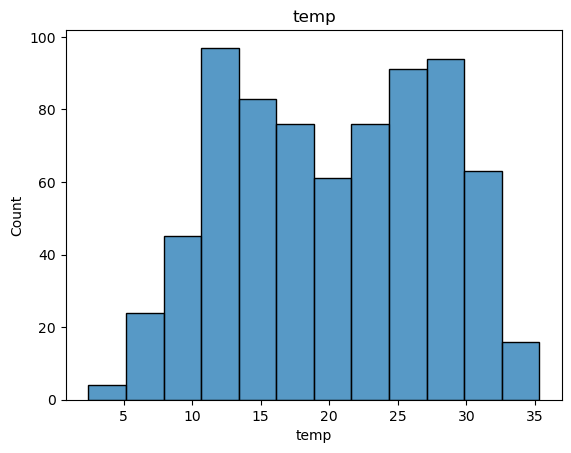

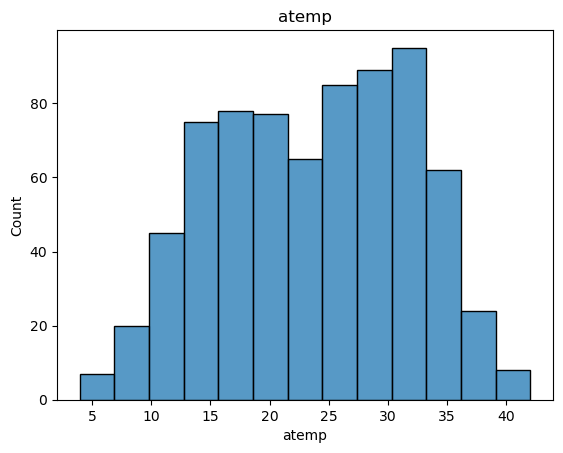

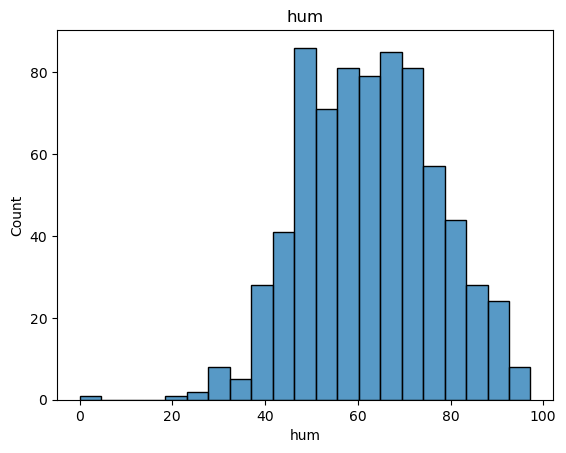

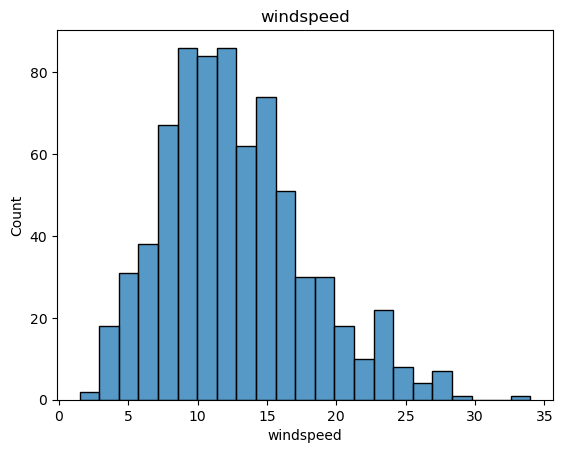

In [15]:
# Draw histplot for the conteneous columns

for col in cont_cols:
    sns.histplot(ds[col])
    plt.title(col)
    plt.show()

## Univariate Analysis for Conteneous varaibale
1. temp and atemp looks more similar
2. mostly the humidity is in between 50 to 75
3. mostly wind speed is between 5 to 20

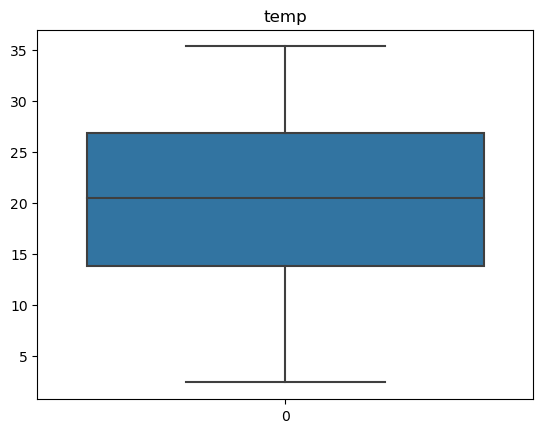

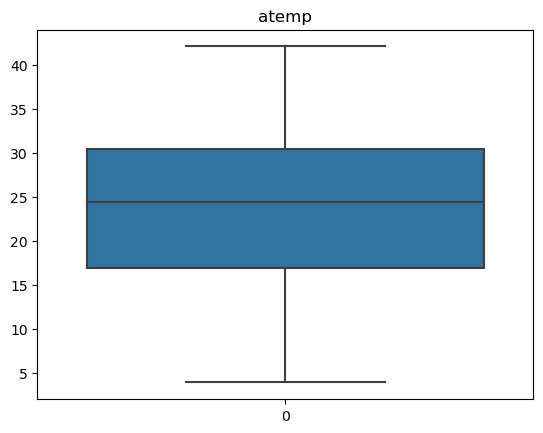

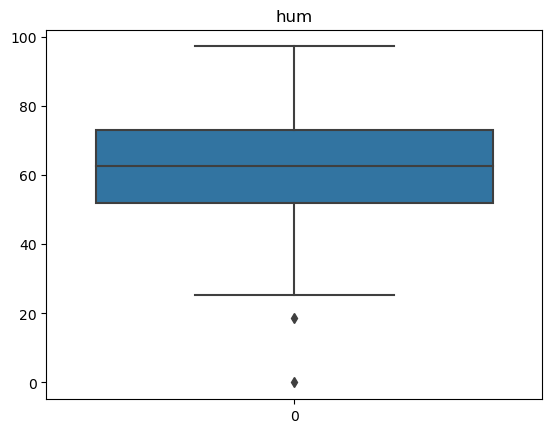

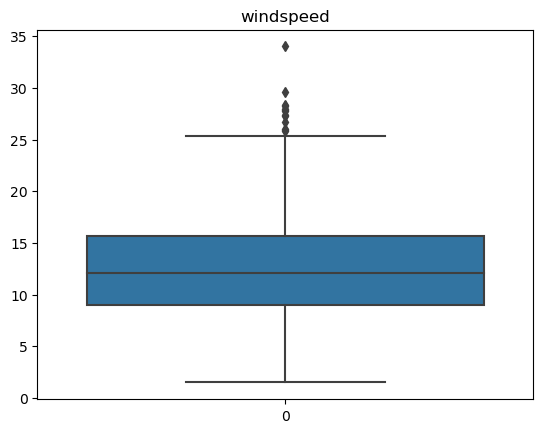

In [16]:
# Outlier analysis

for col in cont_cols:
    sns.boxplot(ds[col])
    plt.title(col)
    plt.show()

## Univariate Outlier Analysis for Conteneous variable
All coneneous variables looks fine with respect to data. There are ceratain outlier in Humidity and Wind speed but those are not impactful.

# Categorical Univariate anlysis

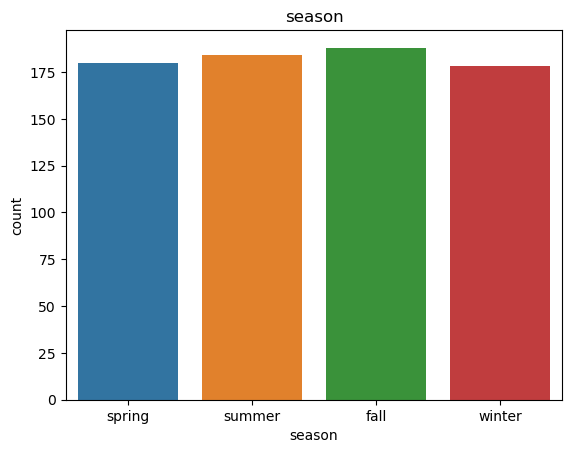

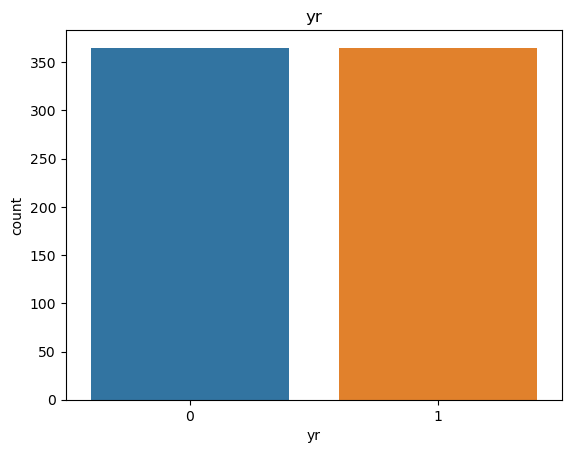

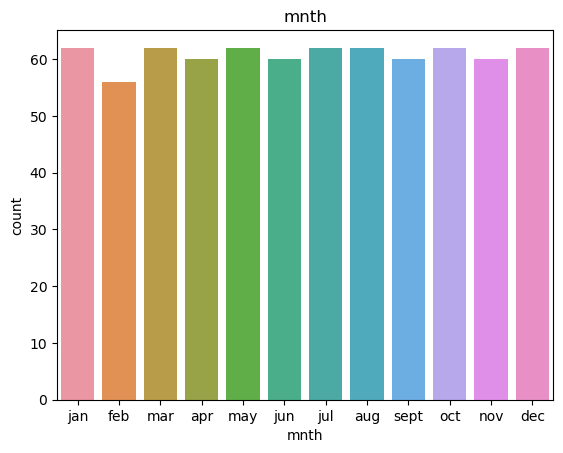

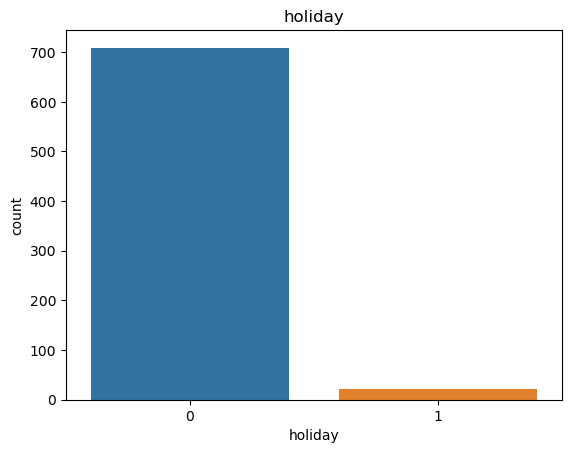

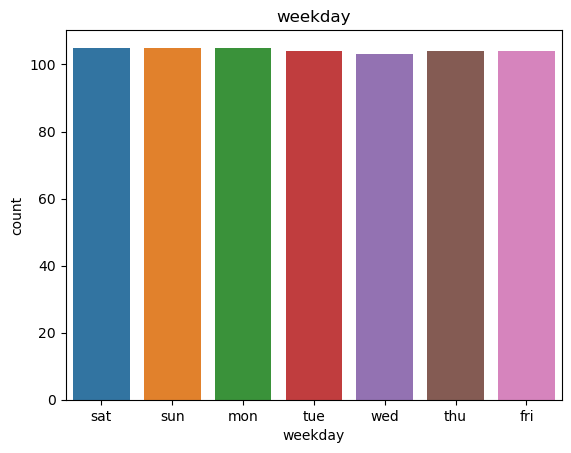

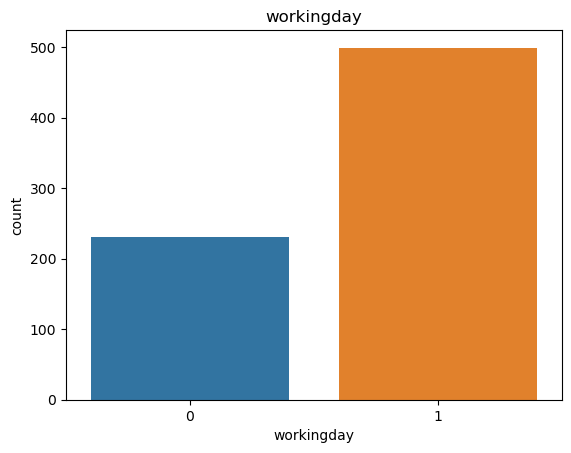

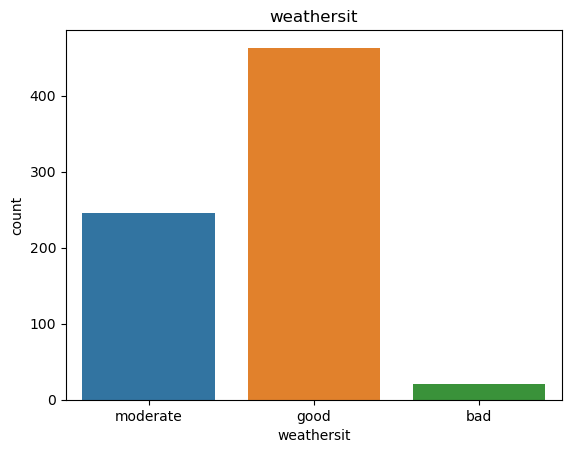

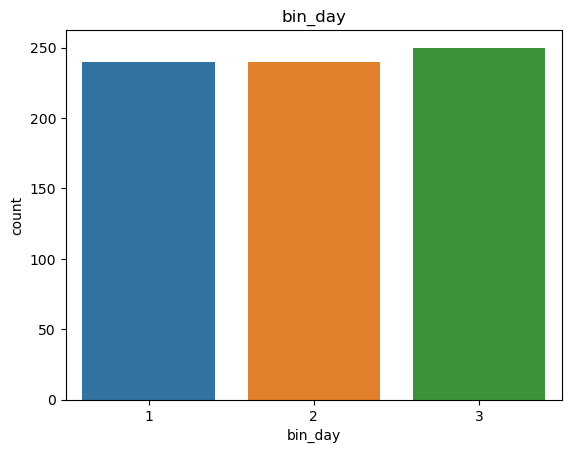

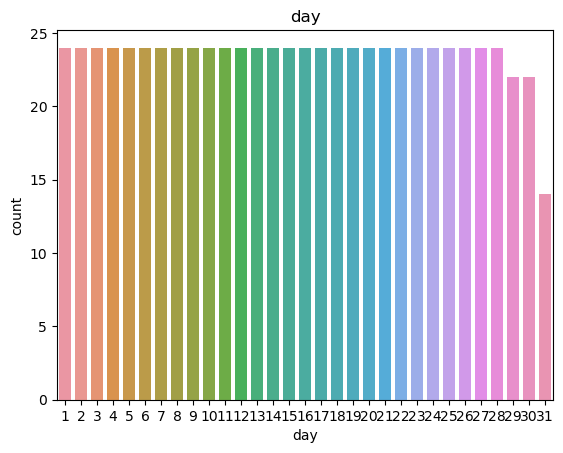

In [17]:
for col in cat_cols:
    sns.countplot(x=ds[col])
    plt.title(col)
    plt.show()

## Categorical Variable Analysis
1. Bike sharing Frequency is more in fall season than other
2. For good and clear weather the frequecy is more
3. Holidays having low frequency of booking
4. Last 3 days of the month frequency drops w.r.t. other days of the month

# Bivariate Analysis

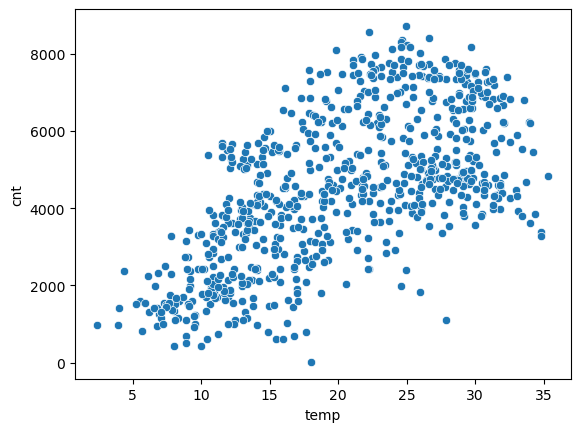

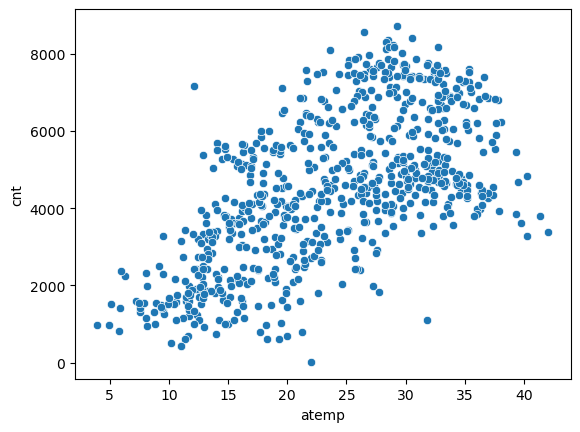

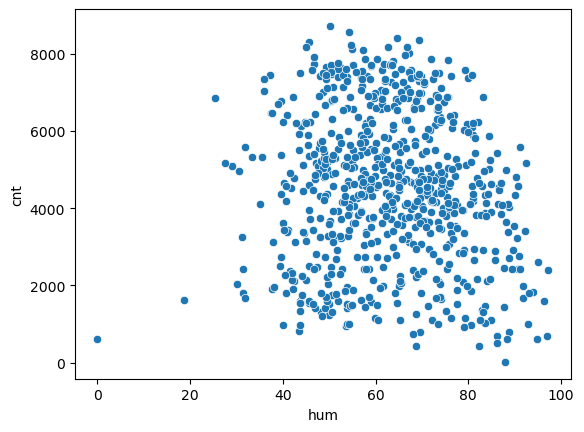

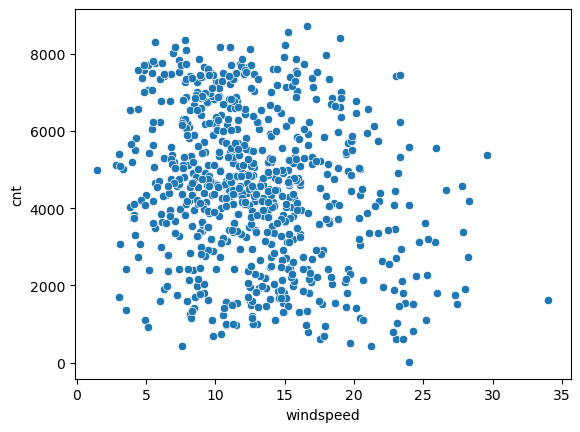

In [18]:
# Bivariate anlysis of all conteneous varibale with cnt
for i in cont_cols:
    sns.scatterplot(x=ds[i],y=ds["cnt"])
    plt.show()

## Bivariate analysis of conteneous variables with cnt
1. cnt increases with increase in temp and atemp, so there is a high linearity
2. cnt is also having positive corelation with humidity
3. cnt is also having negative corelation with wind speed

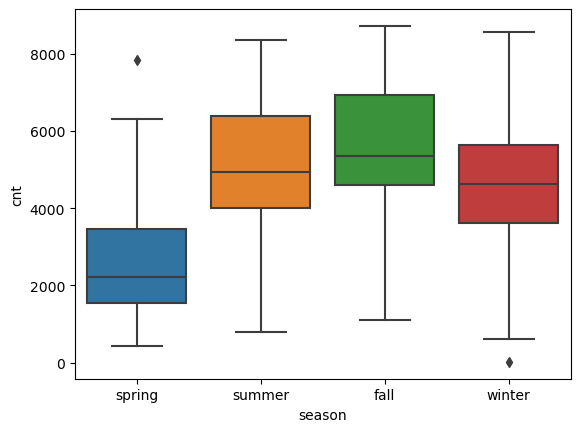

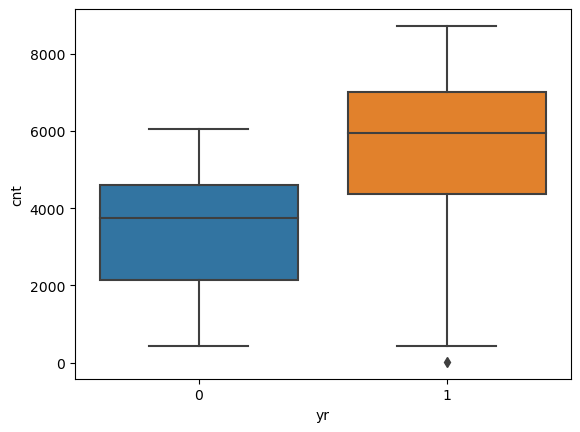

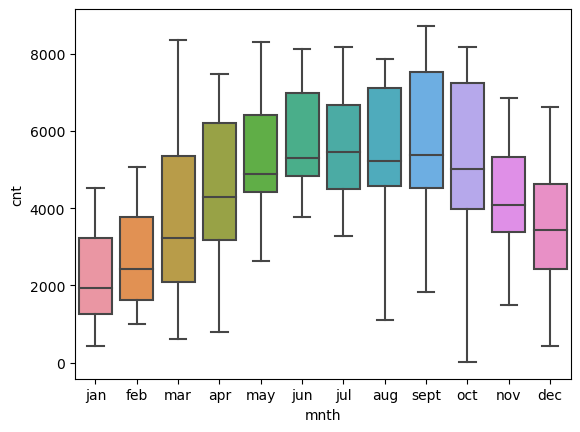

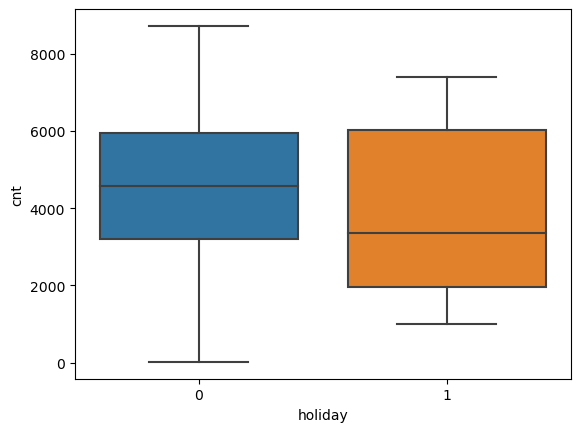

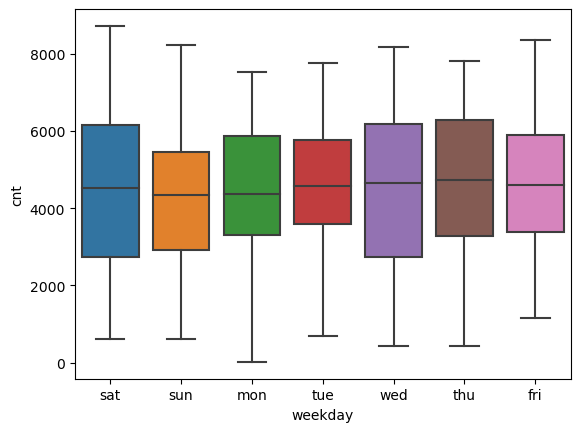

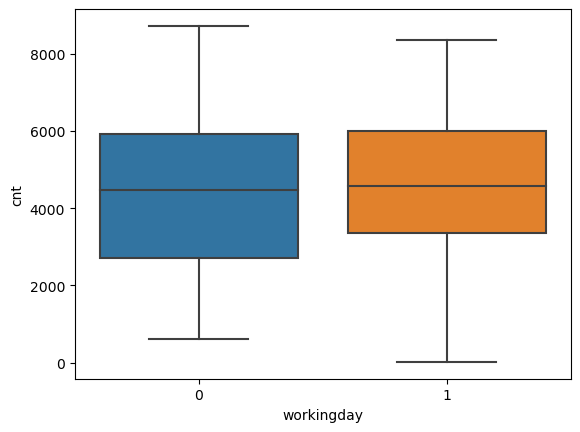

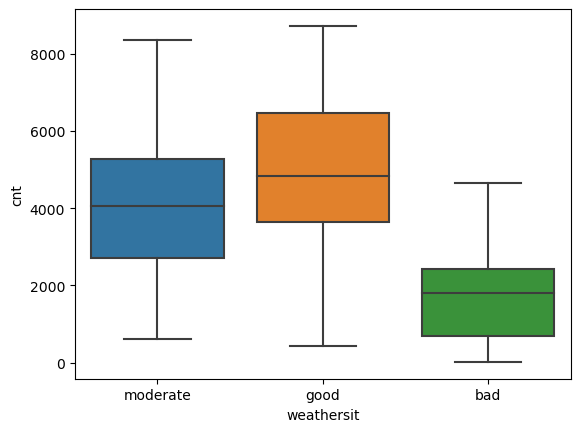

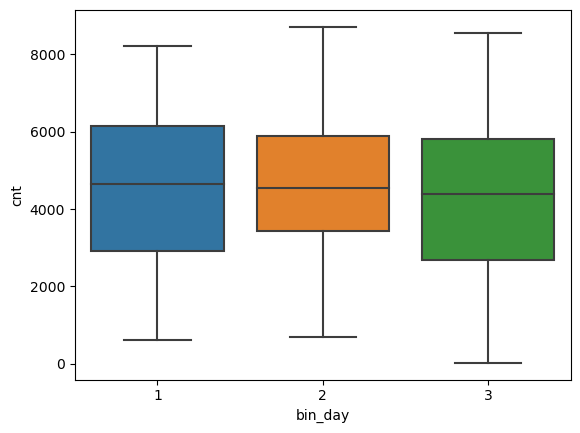

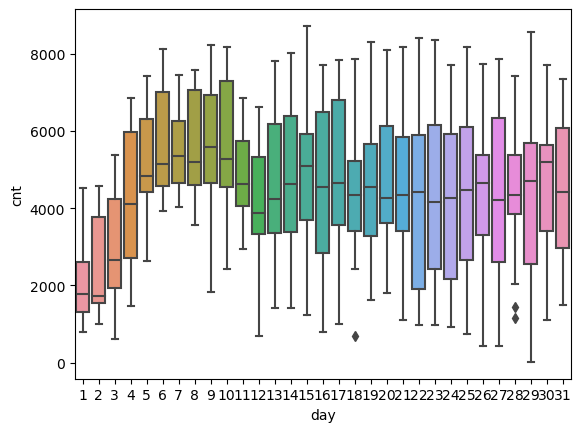

In [19]:
# Bivariate analysis of categorical variavles with cnt
for i in cat_cols:
    sns.boxplot(x=ds[i],y=ds["cnt"])
    plt.show()

## Categorical Bivariate Analysis 
1. Looks like Season 3 that is fall is having high demand of bike sharing
2. In year 2 the demand of the bike sharing increased significantly
3. Demand increased conteneously from Jan to Jun and it was highest in Sept then it gradually decreasing till Dec
4. First 10 days of the month demand is little high then slight low in 2nd and then 3rd 10 days of the month
5. Holidays demand is less
6. Demand increses slightly over 0 week day till 4th week day and then decrese slightly
7. On working days demand is slightly high
8. Weathersit category 1 is high demand of bike sharing than 2 and 3 

# Multivariate

<Axes: >

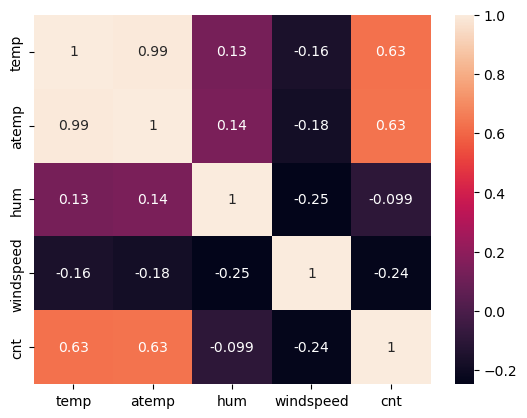

In [20]:
cont_cols.append("cnt")
sns.heatmap(ds[cont_cols].corr(),annot=True)

# Innercolinearity
1. temp and atemp are highly colinear with cnt. However they are also internally highly colinear.
   So either one column can be dropped
2. Both hum and windspeed negativly correlated with cnt

In [21]:
ds.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day',
       'bin_day'],
      dtype='object')

In [22]:
# Drop atemp as its highly inter colinear with temp and we will keep temp only
ds.drop(['atemp'], axis = 1, inplace = True)

In [23]:
# Drop day as we have created bin_day out of it
ds.drop(['day'], axis = 1, inplace = True)

In [24]:
# Final columns
ds.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'bin_day'],
      dtype='object')

In [25]:
ds.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
hum           594
windspeed     649
cnt           695
bin_day         3
dtype: int64

# Dummy Variable Creation

In [26]:
# Create dummy variable for season
season_dum = pd.get_dummies(ds["season"], drop_first=True, dtype=int)
season_dum.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [27]:
# Create dummy variable for weekday
wday_dum = pd.get_dummies(ds["weekday"], drop_first=True, dtype=int)
wday_dum.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [28]:
# Create dummy variable for weathersit
wsit_dum = pd.get_dummies(ds["weathersit"], drop_first=True, dtype=int)
wsit_dum.head()

,good,moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [29]:
# Create dummy variable for bin_day
bindays_dum = pd.get_dummies(ds["bin_day"], drop_first=True, dtype=int)
bindays_dum.head()

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [30]:
# Create dummy variable for month
mnth_dum = pd.get_dummies(ds["mnth"], drop_first=True, dtype=int)
mnth_dum.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
# Add dummy variables to dataset
final_ds = pd.concat([ds, season_dum, wday_dum, wsit_dum, bindays_dum, mnth_dum], axis=1)

In [32]:
# Drop old cat variables from data set
final_ds = final_ds.drop(['season', 'mnth', 'weekday', 'weathersit', 'bin_day'], axis=1)

In [33]:
final_ds.columns

Index([        'yr',    'holiday', 'workingday',       'temp',        'hum',
        'windspeed',        'cnt',     'spring',     'summer',     'winter',
              'mon',        'sat',        'sun',        'thu',        'tue',
              'wed',       'good',   'moderate',            2,            3,
              'aug',        'dec',        'feb',        'jan',        'jul',
              'jun',        'mar',        'may',        'nov',        'oct',
             'sept'],
      dtype='object')

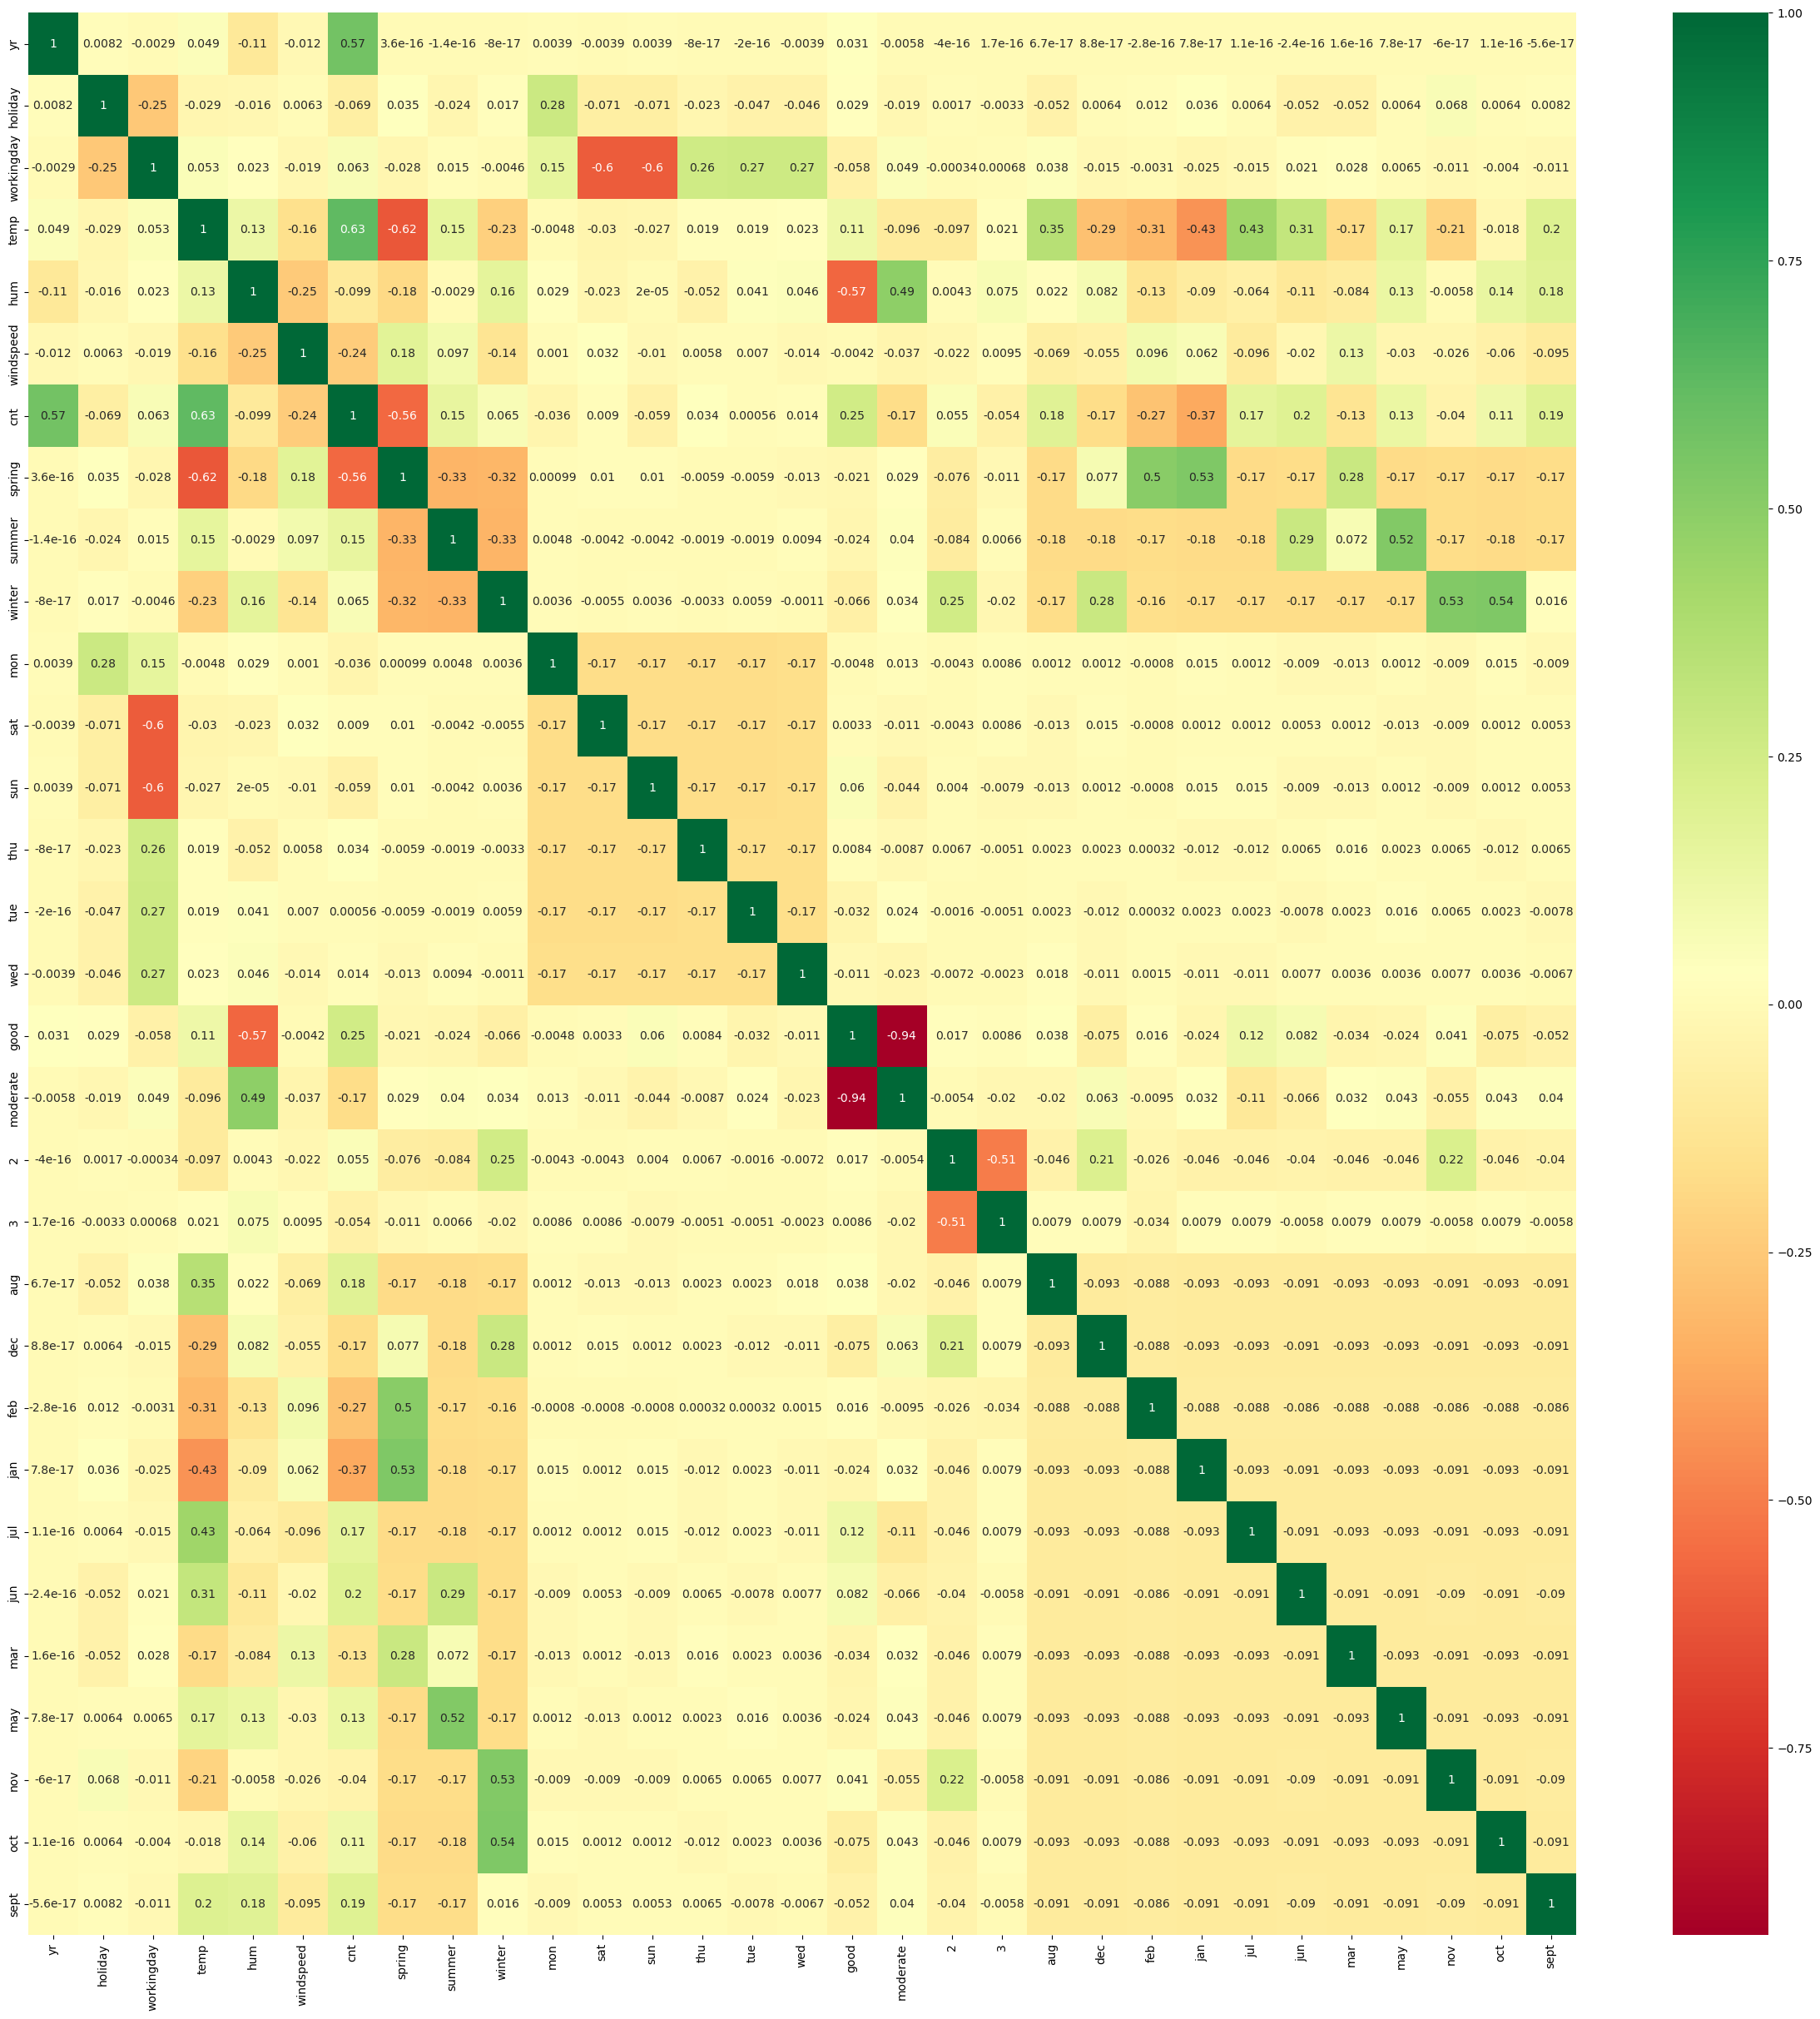

In [34]:
# Correlation diagram
plt.figure(figsize=(30,30))
sns.heatmap(final_ds.corr(),annot=True, cmap="RdYlGn")
plt.show()

# Train Test Split

In [35]:
X=final_ds.drop(["cnt"], axis=1)
y=final_ds["cnt"]

In [36]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,mon,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
# Convert all columns into string
X.columns = X.columns.astype(str)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [39]:
X_train.shape

(584, 30)

# Standardization 

In [40]:
#z=x-xmean/sigma
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,mon,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
367,0.972135,-0.167693,0.704687,-1.882464,-1.350708,2.234862,1.722701,-0.571588,-0.576856,-0.418032,...,-0.309065,-0.281685,3.230029,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,-0.318924,-0.29559
648,0.972135,-0.167693,0.704687,-0.306487,-1.192918,-0.119042,-0.579490,-0.571588,1.730567,-0.418032,...,-0.309065,-0.281685,-0.309065,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,3.130177,-0.29559
44,-1.026903,-0.167693,0.704687,-0.417082,-1.818132,2.902856,1.722701,-0.571588,-0.576856,2.388067,...,-0.309065,3.543988,-0.309065,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,-0.318924,-0.29559
705,0.972135,-0.167693,0.704687,-0.937801,0.956630,-0.771166,-0.579490,-0.571588,1.730567,-0.418032,...,3.230029,-0.281685,-0.309065,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,-0.318924,-0.29559
379,0.972135,-0.167693,-1.416639,-1.790299,-1.508497,0.771778,1.722701,-0.571588,-0.576856,-0.418032,...,-0.309065,-0.281685,3.230029,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,-0.318924,-0.29559


# Step 3 - Modeling

### Feature Selection

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [42]:
# Selected columns
selected_features=X_train.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'sat', 'sun', 'good', 'moderate', '2', 'sept'],
      dtype='object')

In [43]:
# Not selected columns
X_train.columns[~selector.support_]

Index(['mon', 'thu', 'tue', 'wed', '3', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct'],
      dtype='object')

In [44]:
#List of variables selected in top 15 list

list(zip(X_train.columns,selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 8),
 ('wed', False, 15),
 ('good', True, 1),
 ('moderate', True, 1),
 ('2', True, 1),
 ('3', False, 10),
 ('aug', False, 11),
 ('dec', False, 3),
 ('feb', False, 6),
 ('jan', False, 4),
 ('jul', False, 5),
 ('jun', False, 13),
 ('mar', False, 16),
 ('may', False, 12),
 ('nov', False, 2),
 ('oct', False, 9),
 ('sept', True, 1)]

In [45]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [46]:
import statsmodels.api as sm

X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)
X_train_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,sat,sun,good,moderate,2,sept
367,1.0,0.972135,-0.167693,0.704687,-1.882464,-1.350708,2.234862,1.722701,-0.571588,-0.576856,-0.420851,-0.426467,0.765475,-0.721070,-0.688429,-0.29559
648,1.0,0.972135,-0.167693,0.704687,-0.306487,-1.192918,-0.119042,-0.579490,-0.571588,1.730567,-0.420851,-0.426467,0.765475,-0.721070,-0.688429,-0.29559
44,1.0,-1.026903,-0.167693,0.704687,-0.417082,-1.818132,2.902856,1.722701,-0.571588,-0.576856,-0.420851,-0.426467,0.765475,-0.721070,1.450095,-0.29559
705,1.0,0.972135,-0.167693,0.704687,-0.937801,0.956630,-0.771166,-0.579490,-0.571588,1.730567,-0.420851,-0.426467,-1.304142,1.384454,1.450095,-0.29559
379,1.0,0.972135,-0.167693,-1.416639,-1.790299,-1.508497,0.771778,1.722701,-0.571588,-0.576856,-0.420851,2.340831,0.765475,-0.721070,1.450095,-0.29559


In [47]:
# Create First Model
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     234.0
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          2.55e-225
Time:                        00:51:51   Log-Likelihood:                -4697.0
No. Observations:                 584   AIC:                             9424.
Df Residuals:                     569   BIC:                             9489.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     31.559    142.756      0.000    4443.281    4567.254
yr           985.6131     32.125     30.681      0.000     922.516    1048.710
holiday    -2.035e+14   1.78e+15     -0.114      0.909   -3.71e+15     3.3e+15
workingday -5.871e+14   5.15e+15     -0.114      0.909   -1.07e+16    9.52e+15
temp        1034.3223     59.266     17.452      0.000     917.915    1150.730
hum         -193.4547     43.849     -4.412      0.000    -279.580    -107.329
windspeed   -262.6890     34.527     -7.608      0.000    -330.505    -194.873
spring      -170.1555     70.496     -2.414      0.016    -308.619     -31.692
summer       270.7729     47.200      5.737      0.000     178.065     363.480
winter       414.1711     56.668      7.309      0.000     302.867     525.475
sat        -4.459e+14   3.91e+15     -0.114      0.909   -8.12e+15    7.23e+15
sun        -4.501e+14   3.95e+15     -0.114      0.909    -8.2e+15     7.3e+15
good        1035.8200    104.543      9.908      0.000     830.482    1241.158
moderate     792.2327     97.292      8.143      0.000     601.137     983.329
2            109.1840     32.975      3.311      0.001      44.416     173.952
sept         216.9752     34.237      6.337      0.000     149.728     284.222
==============================================================================
Omnibus:                       79.119   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.918
Skew:                          -0.734   Prob(JB):                     5.18e-40
Kurtosis:                       5.298   Cond. No.                     3.87e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.61e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
# Generic function to calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [49]:
calculateVIF(X_train_sm)

,Features,VIF
2,holiday,inf
3,workingday,inf
10,sat,inf
11,sun,inf
12,good,10.95
13,moderate,9.47
7,spring,4.90
4,temp,3.47
9,winter,3.21
8,summer,2.23


In [50]:
# holiday, workingday, sat and sun are having high VIF as well P value, so dropping them
X_train_sm=X_train_sm.drop(['holiday', 'workingday', 'sat', 'sun'],axis=1)
X_test_sm=X_test_sm.drop(['holiday', 'workingday', 'sat', 'sun'],axis=1)

In [51]:
# Create Second Model
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     271.3
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.09e-218
Time:                        00:51:51   Log-Likelihood:                -4721.3
No. Observations:                 584   AIC:                             9467.
Df Residuals:                     572   BIC:                             9519.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     32.815    137.295      0.000    4440.815    4569.719
yr           982.4507     33.345     29.463      0.000     916.957    1047.945
temp        1045.2345     61.175     17.086      0.000     925.080    1165.389
hum         -204.7305     45.508     -4.499      0.000    -294.113    -115.348
windspeed   -262.5007     35.835     -7.325      0.000    -332.886    -192.116
spring      -179.6137     72.767     -2.468      0.014    -322.538     -36.690
summer       274.4452     49.032      5.597      0.000     178.140     370.750
winter       408.9995     58.819      6.954      0.000     293.472     524.527
good         982.6714    108.395      9.066      0.000     769.771    1195.571
moderate     761.2496    101.015      7.536      0.000     562.844     959.656
2            109.6585     34.200      3.206      0.001      42.486     176.831
sept         213.6898     35.559      6.009      0.000     143.847     283.533
==============================================================================
Omnibus:                       86.305   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.614
Skew:                          -0.791   Prob(JB):                     4.51e-44
Kurtosis:                       5.388   Cond. No.                         6.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
calculateVIF(X_train_sm)

,Features,VIF
8,good,10.89
9,moderate,9.46
5,spring,4.91
2,temp,3.47
7,winter,3.21
6,summer,2.23
3,hum,1.92
4,windspeed,1.19
11,sept,1.17
10,2,1.08


In [53]:
# Remove good as it is having high VIF 10.89
X_train_sm=X_train_sm.drop(['good'],axis=1)
X_test_sm=X_test_sm.drop(['good'],axis=1)

In [54]:
# Create Third Model
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     254.2
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          2.77e-203
Time:                        00:51:51   Log-Likelihood:                -4760.5
No. Observations:                 584   AIC:                             9543.
Df Residuals:                     573   BIC:                             9591.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     35.062    128.493      0.000    4436.401    4574.133
yr           978.3644     35.626     27.462      0.000     908.391    1048.338
temp        1116.0844     64.830     17.216      0.000     988.752    1243.417
hum         -368.2035     44.645     -8.247      0.000    -455.891    -280.516
windspeed   -330.4140     37.444     -8.824      0.000    -403.958    -256.870
spring      -129.6556     77.529     -1.672      0.095    -281.931      22.619
summer       303.7381     52.277      5.810      0.000     201.060     406.416
winter       428.2214     62.807      6.818      0.000     304.861     551.582
moderate     -83.1110     41.786     -1.989      0.047    -165.183      -1.039
2            133.6107     36.433      3.667      0.000      62.052     205.169
sept         216.7400     37.993      5.705      0.000     142.117     291.363
==============================================================================
Omnibus:                      111.850   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.239
Skew:                          -0.992   Prob(JB):                     5.66e-59
Kurtosis:                       5.662   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
calculateVIF(X_train_sm)

,Features,VIF
5,spring,4.88
2,temp,3.41
7,winter,3.20
6,summer,2.22
3,hum,1.62
8,moderate,1.42
10,sept,1.17
4,windspeed,1.14
9,2,1.08
1,yr,1.03


In [56]:
# Remove spring as it is having high P value 0.095
X_train_sm=X_train_sm.drop(['spring'],axis=1)
X_test_sm=X_test_sm.drop(['spring'],axis=1)

In [57]:
# Create Fourth Model
model4=sm.OLS(y_train,X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     281.3
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          6.45e-204
Time:                        00:51:51   Log-Likelihood:                -4761.9
No. Observations:                 584   AIC:                             9544.
Df Residuals:                     574   BIC:                             9588.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     35.117    128.292      0.000    4436.293    4574.241
yr           974.0662     35.589     27.370      0.000     904.166    1043.966
temp        1202.6498     39.093     30.763      0.000    1125.866    1279.434
hum         -374.0361     44.578     -8.391      0.000    -461.592    -286.480
windspeed   -335.4125     37.383     -8.972      0.000    -408.836    -261.988
summer       363.0431     38.470      9.437      0.000     287.484     438.602
winter       509.1567     40.095     12.699      0.000     430.406     587.907
moderate     -80.1731     41.814     -1.917      0.056    -162.301       1.955
2            135.2658     36.477      3.708      0.000      63.622     206.910
sept         230.9656     37.087      6.228      0.000     158.123     303.808
==============================================================================
Omnibus:                      107.875   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.195
Skew:                          -0.979   Prob(JB):                     5.71e-54
Kurtosis:                       5.498   Cond. No.                         2.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
calculateVIF(X_train_sm)

,Features,VIF
3,hum,1.61
7,moderate,1.42
6,winter,1.30
2,temp,1.24
5,summer,1.20
4,windspeed,1.13
9,sept,1.11
8,2,1.08
1,yr,1.03
0,const,1.00


In [59]:
# Remove moderate as it is having high P value 0.056
X_train_sm=X_train_sm.drop(['moderate'],axis=1)
X_test_sm=X_test_sm.drop(['moderate'],axis=1)

In [60]:
# Create Fifth Model
model5=sm.OLS(y_train,X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     314.5
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          2.19e-204
Time:                        00:51:51   Log-Likelihood:                -4763.8
No. Observations:                 584   AIC:                             9546.
Df Residuals:                     575   BIC:                             9585.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     35.199    127.995      0.000    4436.133    4574.401
yr           968.6798     35.560     27.241      0.000     898.836    1038.523
temp        1217.6000     38.397     31.711      0.000    1142.184    1293.016
hum         -419.1417     37.953    -11.044      0.000    -493.686    -344.597
windspeed   -340.4762     37.376     -9.109      0.000    -413.887    -267.066
summer       358.6770     38.492      9.318      0.000     283.075     434.279
winter       516.1238     40.023     12.896      0.000     437.515     594.733
2            133.9274     36.555      3.664      0.000      62.130     205.724
sept         230.3444     37.172      6.197      0.000     157.336     303.353
==============================================================================
Omnibus:                      101.000   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.817
Skew:                          -0.948   Prob(JB):                     3.72e-47
Kurtosis:                       5.279   Cond. No.                         1.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
calculateVIF(X_train_sm)

,Features,VIF
6,winter,1.29
2,temp,1.19
5,summer,1.19
3,hum,1.16
4,windspeed,1.13
8,sept,1.11
7,2,1.08
1,yr,1.02
0,const,1.00


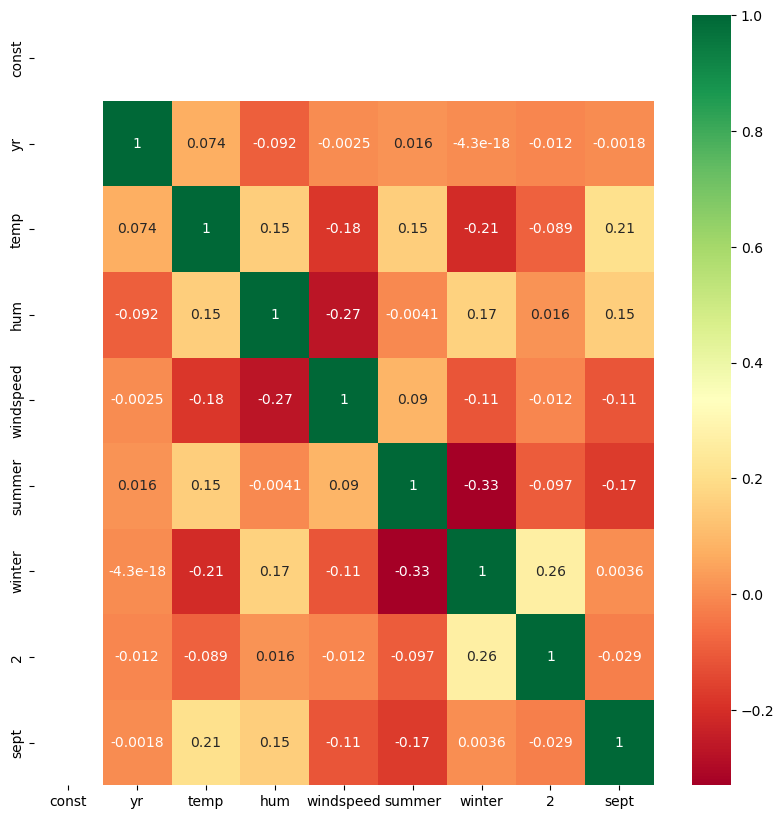

In [62]:
# Correlation diagram
plt.figure(figsize=(10,10))
sns.heatmap(X_train_sm.corr(),annot=True, cmap="RdYlGn")
plt.show()

### There is no inter colinearity between the variables

# Step 4 - Residual Analysis of the train data and validation

In [63]:
# Get the predicted train data from the model
y_train_pred = res5.predict(X_train_sm)

In [64]:
# Get the resedual
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

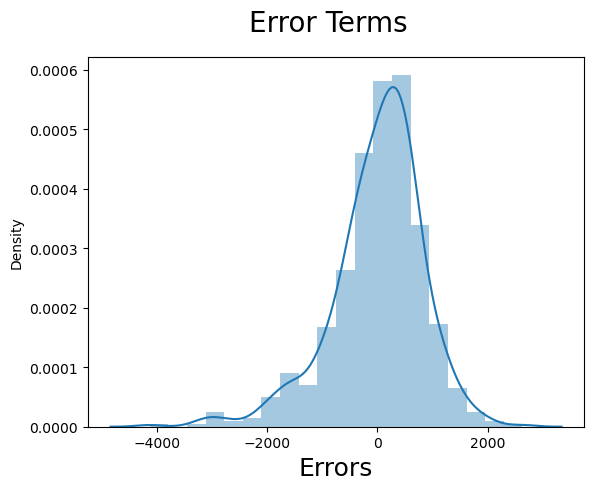

In [65]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

# Step 5 - Prediction and Evaluation on the Test Set

In [66]:
# Check the X_test
X_test_sm.head()

,const,yr,temp,hum,windspeed,summer,winter,2,sept
184,1.0,-0.892733,1.101193,0.137062,-1.429568,-0.612188,-0.527995,-0.741217,-0.311568
535,1.0,1.112483,1.393399,-0.165012,-0.999233,1.622298,-0.527995,1.339892,-0.311568
299,1.0,-0.892733,-0.242093,1.290418,0.118115,-0.612188,1.880984,-0.741217,-0.311568
221,1.0,-0.892733,1.310535,-1.271680,0.151322,-0.612188,-0.527995,-0.741217,-0.311568
152,1.0,-0.892733,1.040132,-2.057063,1.376185,1.622298,-0.527995,-0.741217,-0.311568


In [67]:
# get the predicted test data
y_test_pred = res5.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

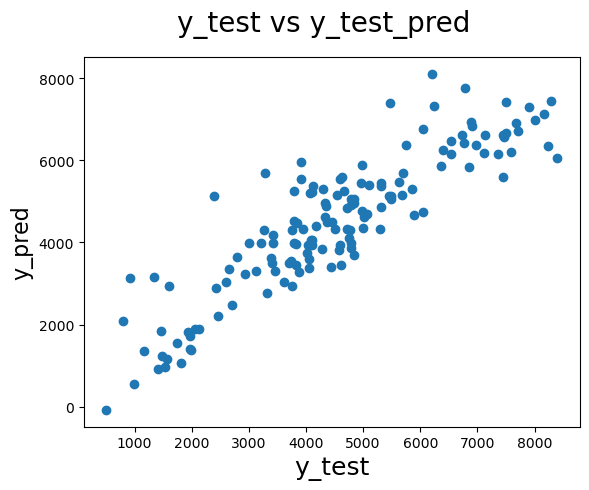

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [69]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7864952846995277

In [70]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
adjusted_r2

0.7619

# Conclusion

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.814
- Test dataset R^2           : 0.786
- Train dataset Adjusted R^2 : 0.811    
- Test dataset Adjusted R^2  : 0.762

Most relevant varibales need to be consider for prediction are
1. yr
2. temp
3. hum
4. windspeed
5. season like - summer, winter
6. month like - sep